<div style="border:solid Green 2px; border-radius: 10px;  padding: 40px">
<b>Привет, Константин!👋</b>
    
Меня зовут Зуева Юлия, можно просто Юля 😏 Я буду ревьюером твоего проекта. Предлагаю обращаться на "ты", но если это неудобно, пожалуйста, скажи об этом! 
    
Моя основная цель - помочь тебе стать компетентным Data Scientist'ом: вместе преодолеть трудности и еще больше развить твои сильные навыки 💪 В твоей работе я оставила комментарии, которые должны в этом помочь. Для твоего удобства комментарии раскрашены разными цветами: 
<br/>
<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> В случае корректного решения (или отдельных его моментов). На такие решения можно опираться в будущем.
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> Если есть возможность как-либо улучшить решение. Ты можешь учесть эти комментарии при доработке проекта, однако для зачета это не обязательно.
</div>
<div style="border-radius: 10px" class="alert alert-block alert-danger">
<b>Нужно доработать ❌:</b> Если решение требует внесения правок. Проект не может быть принят, если остались не отработанные комментарии данного типа.
</div>
    
Чтобы наша с тобой работа была еще эффективнее, ты точно так же можешь оставлять комментарии и задавать мне вопросы. Для таких случаев, пожалуйста, выбери собственное оформление комментариев, которое будет отличаться от моего, чтобы не создавалась путаница. По этой же причине попрошу тебя не удалять и не изменять мои комментарии. Все это позволит лучше ориентироваться в нашем с тобой диалоге, а повторную проверку (в случае ее необходимости) выполнять оперативнее 🚀
    
Не спеши расстраиваться, если что-то не удалось с первого раза. Вместе мы обязательно разберемся со всеми трудностями! 🤓

# Анализ лояльности пользователей Яндекс Афиши

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Вводная часть <a class="tocSkip"></h4>
    
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> В любой работе важно оставлять вводную часть. Она помогает быстро понять цель, контекст и структуру работы, что будет удобно не только для тебя при возвращении к проекту спустя время, но и любому другому читателю (если, например, публикуешь в открытый доступ для портфолио). Воспринимаем эту тетрадку не просто как выполнение домашней работы на курсе, а как полноценный исследовательский проект.

Како правило, во вводную часть включают название проекта, краткое описание цели, используемых данных (источники, объем, особенности), нюансы самого проекта (специфические условия, ограничения, предположения и т.д.). Иногда также сразу обозначают план шагов. Другими словами, вводная часть призвана отразить, что мы делаем, с чем работаем и на каких условиях.
</div>

## Этапы выполнения проекта

### 1. Загрузка данных и их предобработка

---

**Задача 1.1:** Напишите SQL-запрос, выгружающий в датафрейм pandas необходимые данные. Используйте следующие параметры для подключения к базе данных `data-analyst-afisha`:

- **Хост** — `rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net`
- **База данных** — `data-analyst-afisha`
- **Порт** — `6432`
- **Аутентификация** — `Database Native`
- **Пользователь** — `praktikum_student`
- **Пароль** — `Sdf4$2;d-d30pp`

Для выгрузки используйте запрос из предыдущего урока и библиотеку SQLAlchemy.

Выгрузка из базы данных SQL должна позволить собрать следующие данные:

- `user_id` — уникальный идентификатор пользователя, совершившего заказ;
- `device_type_canonical` — тип устройства, с которого был оформлен заказ (`mobile` — мобильные устройства, `desktop` — стационарные);
- `order_id` — уникальный идентификатор заказа;
- `order_dt` — дата создания заказа (используйте данные `created_dt_msk`);
- `order_ts` — дата и время создания заказа (используйте данные `created_ts_msk`);
- `currency_code` — валюта оплаты;
- `revenue` — выручка от заказа;
- `tickets_count` — количество купленных билетов;
- `days_since_prev` — количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой — значение пропущено;
- `event_id` — уникальный идентификатор мероприятия;
- `service_name` — название билетного оператора;
- `event_type_main` — основной тип мероприятия (театральная постановка, концерт и так далее);
- `region_name` — название региона, в котором прошло мероприятие;
- `city_name` — название города, в котором прошло мероприятие.

---


In [1]:
#выгружаем в датафрейм pandas необходимые данные
from phik import phik_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
db_config = {'user': 'praktikum_student', # имя пользователя
             'pwd': 'Sdf4$2;d-d30pp', # пароль
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432, # порт подключения
             'db': 'data-analyst-afisha' # название базы данных
             }
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)
engine = create_engine(connection_string)

query = '''
WITH set_config_precode AS (
  SELECT set_config('synchronize_seqscans', 'off', true)
)
SELECT
    -- данные о заказе
    p.user_id,
    p.device_type_canonical,
    p.order_id,
    p.created_dt_msk AS order_dt,
    p.created_ts_msk AS order_ts,
    p.currency_code,
    p.revenue,
    p.tickets_count,
    (
      p.created_dt_msk::date
      - LAG(p.created_dt_msk::date) OVER (
          PARTITION BY p.user_id
          ORDER BY p.created_dt_msk::date
        )
    ) AS days_since_prev,

    -- данные о мероприятии и месте проведения
    p.event_id,
    e.event_name_code AS event_name,
    e.event_type_main,
    p.service_name,
    r.region_name,
    c.city_name
FROM afisha.purchases AS p
INNER JOIN afisha.events  AS e ON e.event_id = p.event_id
INNER JOIN afisha.city    AS c ON c.city_id = e.city_id
INNER JOIN afisha.regions AS r ON r.region_id = c.region_id
WHERE p.device_type_canonical IN ('mobile', 'desktop')
  AND e.event_type_main != 'фильм'
ORDER BY p.user_id;
'''
df = pd.read_sql_query(query, con=engine)

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Импорты <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b>

* Сейчас тетрадка пришла невыполненная.
    
    
* Все необходимые библиотеки лучше подгружать сразу в начале проекта, это соответствует стандартам оформления кода <a href='https://pyplanet.ru/article/pep-0008.html'>PEP 8</a>. Такой подход позволяет сразу видеть, какое окружение необходимо для запуска проекта, избежать дублирования импортов в разных частях кода, а также облегчить отладку и переносимость проекта. 
    
    
* Хорошей практикой также является упорядочивание импортов. PEP 8 рекомендует сначала подгружать стандартные python-библиотеки, затем сторонние. Но для удобства каждую их этих групп также можно структурировать по тематике. Например, библиотеки для работы с данными, для работы с графиками и т.д. Так удобнее поддерживать порядок в импортах от проекта к проекту, не подгружать лишнее.

    
</div>
    
<h4> Загрузка данных <a class="tocSkip"></h4>
<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Выгрузка данных проведена корректно! Была выполнена необходимая фильтрация данных, выгружены только необходимые для анализа данные. Отлично, что сразу подсчитываешь время между заказами для каждого пользователя.

</div>

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Импортирование библиотек и загрузка данных - это все-таки разные этапы, поэтому для лучшей структурности лучше разделить их на отдельные разделы.
    
    
* Сейчас ты явным образом прописываешь параметры подключения к БД. В таком виде выкладывать работу в публичный доступ небезопасно, кто-то сможет завладеть подключением, украсть или повредить данные. Лучше сразу в процессе работы держать чувствительные значения отдельно от основного содержания, иначе есть высокий риск забыть об этом нюансе. 
    
    Чтобы засекретить подключение, необходимо сложить все параметры в `.env` файл (или другой конфигурационный файл вне Git) и указать его в `.gitignore`:

    ```python
DB_NAME="..."
DB_HOST="..."
DB_PORT="..."
DB_USER="..."
DB_PASSWORD="..."
```
    
    В самом проекте мы можем обращаться к сохраненным параметрам, для этого нам потребуются библиотеки `dotenv`, чтобы загрузить переменные окружения, и `os`, чтобы обратиться к ним:
    
    ```python
import os
import dotenv 
load_dotenv() # автоматически ищет .env в текущей директории
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    os.getenv('DB_USER'),
    os.getenv('DB_PASSWORD'),
    os.getenv('DB_HOST'),
    os.getenv('DB_PORT'),
    os.getenv('DB_NAME'),
) 
```

    Также данный файл можно добавить в репозиторий и здесь на платформе. Для этого нужно нажать на лого jupyter hub, найти кнопку для создания нового файла, внести необходимое содержимое, переименовать файл нужным образом и сохранить.
    
</div>

In [2]:
#выводим первые 10 строк датафрейма для ознакомления
display(df.head(10))

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,region_name,city_name
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,Край билетов,Каменевский регион,Глиногорск
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,Мой билет,Каменевский регион,Глиногорск
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,За билетом!,Каменевский регион,Глиногорск
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,другое,Лови билет!,Североярская область,Озёрск
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,Билеты без проблем,Озернинский край,Родниковецк
5,000898990054619,mobile,2613713,2024-10-23,2024-10-23 15:12:00,rub,902.74,3,19.0,500862,9cc55c15-4375-4129-9979-3129688ba1b4,концерты,Облачко,Лугоградская область,Кристалевск
6,00096d1f542ab2b,desktop,6636941,2024-08-15,2024-08-15 16:48:48,rub,917.83,4,NaN,201953,2f98d69f-4e60-4ffc-8f16-e539383526b1,театр,Край билетов,Каменевский регион,Глиногорск
7,000a55a418c128c,mobile,4657981,2024-09-29,2024-09-29 19:39:12,rub,47.78,1,NaN,265857,0d876e01-851e-458b-ba61-753e0e0c4063,театр,Лучшие билеты,Поленовский край,Дальнозолотск
8,000a55a418c128c,mobile,4657952,2024-10-15,2024-10-15 10:29:04,rub,74.84,2,16.0,271579,ddc795f8-7ef8-4eb0-b299-cb3e6ee24ba1,театр,Лучшие билеты,Поленовский край,Дальнозолотск
9,000cf0659a9f40f,mobile,6818017,2024-06-20,2024-06-20 10:35:26,rub,1421.91,4,NaN,516728,11be386f-7cb7-4aa1-a8e4-ba73a29c1af2,концерты,Лови билет!,Широковская область,Радужнополье


---

**Задача 1.2:** Изучите общую информацию о выгруженных данных. Оцените корректность выгрузки и объём полученных данных.

Предположите, какие шаги необходимо сделать на стадии предобработки данных — например, скорректировать типы данных.

Зафиксируйте основную информацию о данных в кратком промежуточном выводе.

---

In [4]:
#изучим общую информацию о данных и ее корректность
display(df.info())

<class 'pandas.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  str           
 1   device_type_canonical  290611 non-null  str           
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  object        
 4   order_ts               290611 non-null  datetime64[us]
 5   currency_code          290611 non-null  str           
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  event_name             290611 non-null  str           
 11  event_type_main        290611 non-null  str           
 12  service_name           290611 non-null  str           


None

выгружены данные. Кол-во строк составляет - 290611, все значения в датафрейме - ненулевые, пропуски присутствуют только в столбце days_since_prev

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Проверка корректности загруженных данных <a class="tocSkip"></h4>
<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> 

* Хорошо, что убеждаешь в корректности данных! Если при подгрузке возникли проблемы, а мы их не обнаружим, все последующие расчеты могут быть искажены.

    
* Круто, что не забываешь зафиксировать промежуточные наблюдения в выводах! Если потребуется вернуться к проекту спустя время, будет проще освежить в памяти все ключевые этапы работы, что и почему мы делали, что получили.

</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b>
    

* `print` используется для простого текстового вывода. Но в средах с поддержкой rich output (Jupyter, IPython) также доступен `display`. Для объектов, где важно сохранить форматирование или визуализацию (DataFrame, картинки, графики, HTML и т.д.) лучше использовать его.
    
    
* На основе чего сделан выводы о ненулевых значениях?
    
    
* Стоит предположить, что пропуски, скорее всего, образовались на первых заказах пользователей, в таком случае у них не существует предыдущего, от которого можно было бы посчитать количество дней.

    
* По результатам проверки корректности загруженных данных мы планируем дальнейшие шаги по обработке. Здесь можно было бы отметить, что нам потребуется привести выручку к единой валюте, убедиться, что пропуски действительно имеются только у первых заказов, выполнить проверку на дубликаты (полные и неполные), проверить категориальные столбцы на предмет неявных дубликатов (разный регистр, разный формат записи, опечатки) и все числовые столбцы на наличие невалидных значений и аномалий, опционально сменить типы данных на более оптимальные, чтобы уменьшить объем занимаемой памяти.
    
</div>

---

###  2. Предобработка данных

Выполните все стандартные действия по предобработке данных:

---

**Задача 2.1:** Данные о выручке сервиса представлены в российских рублях и казахстанских тенге. Приведите выручку к единой валюте — российскому рублю.

Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год — `final_tickets_tenge_df.csv`. Его можно загрузить по пути `https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')`

Значения в рублях представлено для 100 тенге.

Результаты преобразования сохраните в новый столбец `revenue_rub`.

---


In [ ]:
#приведем данные к нужным типам и добавим расчет выручки в рублях
rate = pd.read_csv("https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv")
rate["data"] = pd.to_datetime(rate["data"]).dt.date
rate["cdx"] = rate["cdx"].str.lower()

df["order_dt"] = pd.to_datetime(df["order_dt"]).dt.date
df["currency_code"] = df["currency_code"].str.lower()

df = df.merge(
    rate[["data", "cdx", "curs"]],
    how="left",
    left_on=["order_dt", "currency_code"],
    right_on=["data", "cdx"]
)

df["revenue_rub"] = df["revenue"].where(
    df["currency_code"].ne("kzt"),
    df["revenue"] * df["curs"] / 100
)

# добавил проверку
print("RUB changed:", (df.loc[df["currency_code"].eq("rub"), "revenue"]
                       != df.loc[df["currency_code"].eq("rub"), "revenue_rub"]).sum())
print("KZT NaN in revenue_rub:", df.loc[df["currency_code"].eq("kzt"), "revenue_rub"].isna().sum())

df = df.drop(columns=["data", "cdx", "curs"])
print(df.columns)
display(df.head())

RUB changed: 0
KZT NaN in revenue_rub: 0
Index(['user_id', 'device_type_canonical', 'order_id', 'order_dt', 'order_ts',
       'currency_code', 'revenue', 'tickets_count', 'days_since_prev',
       'event_id', 'event_name', 'event_type_main', 'service_name',
       'region_name', 'city_name', 'revenue_rub'],
      dtype='str')


,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,region_name,city_name,revenue_rub
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,Край билетов,Каменевский регион,Глиногорск,1521.94
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,Мой билет,Каменевский регион,Глиногорск,289.45
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,За билетом!,Каменевский регион,Глиногорск,1258.57
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,другое,Лови билет!,Североярская область,Озёрск,8.49
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,Билеты без проблем,Озернинский край,Родниковецк,1390.41


провели расчет выручки из казахстанских тенге в российские рубли

<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
Поправил расчет выручки в тенге в соответствии с комментариями

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Перевод выручки в рубли <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-block alert-danger">
 
<b>Нужно доработать ❌:</b> Обрати внимание, что ты сейчас присоединяшь курс и наименование валюты к каждой строке основной таблицы, а затем при проверке условия задействуешь наименование курса из присоединенной таблицы. В итоге у тебя сейчас конвертивровались абсолютно все значения, в том числе исходно рублевые.

</div>


<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Сперва следовало убедиться в корректности данных с курсом, по всем ли датам есть курс, адекватные ли там значения, нет ли дубликатов, а уже потом переходить к конвертации.


* Условный метод реализован и в pandas - [where](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html). Мы можем присоединить курс к нашей таблице с пользователями, применить данный метод к столбцу с выручкой и указать условие, которое будем проверять, а также альтернативный вариант значения. Если условие выполняется, то берется значение из столбца, если нет - альтернативное значение. Тогда расчет выручки в рублях будет выглядеть следующим образом:
    
    ```python
df['revenue_rub'] = df['revenue'].where(df['currency_code'] == 'rub', df['revenue'] * df['curs'] / 100)
```

* После проведения каких-либо манипуляций с данными необходимо убеждаться, что все выполнилось корректно. Для проверки результата стоит вывести на обозрение только связанные с данной задачей столбцы, чтобы не перегружать читателя лишним. При этом проверить оба кейса, и когда корректировка требовалась, и когда нет, убедиться, что не образовалось пропусков.
    
 
* Это исследовательская работа, а не скрипт, поэтому важно фиксировать свой ход мыслей, пояснять свои шаги и делать выводы относительно результатов, то есть вести последовательный сторителлинг, что зачем и почему мы делаем, что по итогу получаем, достигли ли нужного нам результата.
    
   
* Напоминаю про моменты, поясненные ранее: отображение таблиц.

</div>

---

**Задача 2.2:**

- Проверьте данные на пропущенные значения. Если выгрузка из SQL была успешной, то пропуски должны быть только в столбце `days_since_prev`.
- Преобразуйте типы данных в некоторых столбцах, если это необходимо. Обратите внимание на данные с датой и временем, а также на числовые данные, размерность которых можно сократить.
- Изучите значения в ключевых столбцах. Обработайте ошибки, если обнаружите их.
    - Проверьте, какие категории указаны в столбцах с номинальными данными. Есть ли среди категорий такие, что обозначают пропуски в данных или отсутствие информации? Проведите нормализацию данных, если это необходимо.
    - Проверьте распределение численных данных и наличие в них выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха.
        
        Важные показатели в рамках поставленной задачи — это выручка с заказа (`revenue_rub`) и количество билетов в заказе (`tickets_count`), поэтому в первую очередь проверьте данные в этих столбцах.
        
        Если обнаружите выбросы в поле `revenue_rub`, то отфильтруйте значения по 99 перцентилю.

После предобработки проверьте, были ли отфильтрованы данные. Если были, то оцените, в каком объёме. Сформулируйте промежуточный вывод, зафиксировав основные действия и описания новых столбцов.

---

In [5]:
#проверка столбцов на пропуски
display(df.isna().sum())

user_id                      0
device_type_canonical        0
order_id                     0
order_dt                     0
order_ts                     0
currency_code                0
revenue                      0
tickets_count                0
days_since_prev          21933
event_id                     0
event_name                   0
event_type_main              0
service_name                 0
region_name                  0
city_name                    0
revenue_rub                  0
dtype: int64

In [6]:
#преобразуем типы данных в числовых столбцах
df[['order_id', 'tickets_count', 'event_id']] = df[['order_id', 'tickets_count', 'event_id']].astype('int8')
df[['revenue', 'days_since_prev']] = df[['revenue', 'days_since_prev']].astype('float16')

C:\Users\1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\dtypes\astype.py:136: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=copy)


In [7]:
#проверка на дубликаты
print(df.duplicated().sum())

0


In [9]:
#проверим распредление данных и наличие в них выбросов
import matplotlib.pyplot as plt
df[['revenue_rub', 'tickets_count']].describe()

,revenue_rub,tickets_count
count,287786.000000,287786.000000
mean,518.029224,2.740495
std,511.963780,1.163073
min,-90.760000,1.000000
25%,111.850000,2.000000
50%,343.850000,3.000000
75%,788.660000,3.000000
max,2628.421739,57.000000


count    287786.000000
mean        518.029224
std         511.963780
min         -90.760000
25%         111.850000
50%         343.850000
75%         788.660000
max        2628.421739
Name: revenue_rub, dtype: float64

count    287786.000000
mean          2.740495
std           1.163073
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max          57.000000
Name: tickets_count, dtype: float64

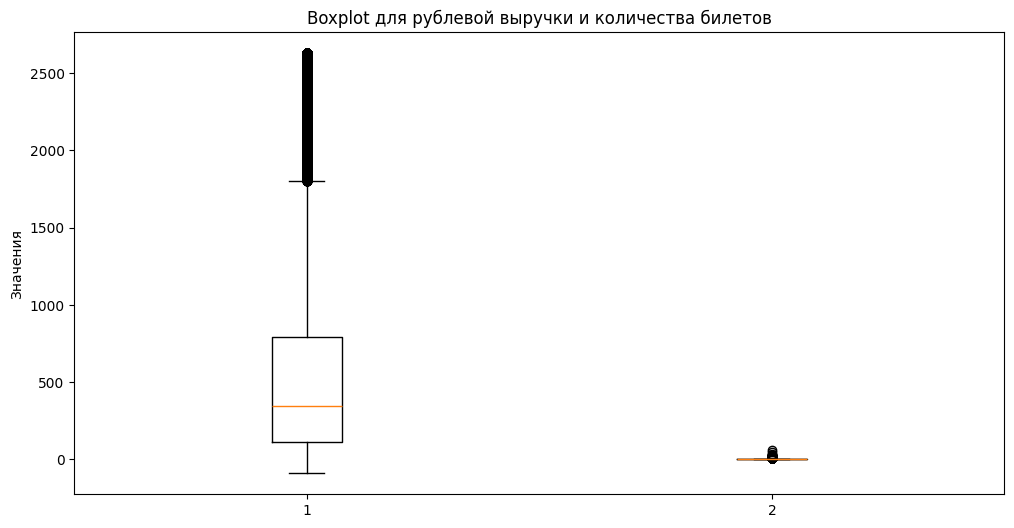

In [8]:
#визуализируем распределения для столбцов через boxplot
p99 = df["revenue_rub"].quantile(0.99)
df = df[df["revenue_rub"] <= p99]
display(df['revenue_rub'].describe())
display(df['tickets_count'].describe())

plt.figure(figsize=(12, 6))
plt.boxplot(df[['revenue_rub', 'tickets_count']])
plt.title('Boxplot для рублевой выручки и количества билетов')
plt.ylabel('Значения')
plt.show()

провели анализ распредления в ключевых столбцах через боксплот для наглядной демонстрации распредления значений и выбросов. Обе категории имеют высокую выраженность выбросов, правую ассиметрию, высокие показатели стандартного отклонения в процентном измерении. Фильтрация по 99 перцентилю позволила избавиться от 8633 значений выбросов, что сильно упростило статистический аналз.

<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
нормализовать все номинальные признаки, проверить на неявные дубликаты странные значения
выручка и колво билетов распилить на разные оси
исключить отрицательные значения в выручке, предварительно проверив какой процент данных потеряем
в выводе предобработки указать в долевом выражении сколько данных потеряли

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Предобработка данных <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-block alert-danger">
 
<b>Нужно доработать ❌:</b>
    
    
* Решение по пропускам не пояснено, почему оставляем, как есть? Было бы не лишним убедиться, что пропуски имеются только в количестве дней между заказами у первых заказов пользователей, то есть что проблемы здесь нет, это как раз и будет обоснованием.


* Не уделено внимание номинальным признакам, не требуется ли там нормализация? Нет ли неявных дубликатов? При проверке на неявные дубликаты стоит проверять самые редкие значения. Если они странно выглядят, отличаются от основного формата записи, значит дубликаты имеются, нужно изучить вопрос более подробно.
    
    
* Выручка и количество билетов имеют кардинально разный порядок значений, их не следует помещать на график с общей осью.
    
    
* Стоит также обратить внимание, что у нас есть отрицательные значения выручки. Возможно, это какие-то возвраты. По-хорошему, их тоже следовало бы исключить, чтобы не завышать количество валидных транзакций на пользователя. Перед этим не забываем проверить, какой процент данных потеряем, не критично ли это.
    
    
* После завершения предобработки необходимо зафиксировать итоговые выводы - кратко, что было проделано и какие решения приняты, сколько данных мы потеряли и сколько пойдет в дальнейший анализ, достаточно ли это. Потери и остаток лучше рассчитывать динамически, чтобы они автоматически подстраивались под корректировки выше по коду.
    
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации 💡:</b> 

* Дубликаты могут быть в том числе и неполные, например, если заказ пользователя задублировался в системе, был создан в нескольких экземплярах с разным `order_id` и, возможно, даже с небольшой разницей во времени, за которое человек не успел бы вручную произвести еще одну покупку. Чтобы не искажать статистические расчеты, от таких наблюдений тоже важно избавляться. Но для начала нужно проверить их наличие - для этого необходимо проверить, есть ли дубликаты на подвыборке без `order_id` и `days_since_prev`. Если обнаружим их и примем решение удалить, то потребуется также пересчитать признак с количеством дней между заказами.


* Снизить размерность типа для количественных показателей имеет смысл уже после проведения предобработки. Для смены числовых типов лучше использовать [to_numeric](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html) с настройкой `downcast`, чтобы минимальная возможная точность определялась автоматически, и мы случайно бы не стерли вариативность (для количества дней только заранее нужно перевести в `Int`, который, в отличие от `int`, дозволяет присутствие пропусков, а уже потом даункастить).
    
    
* Также, если признак состоит из повторяющихся категорий (в этом нужно убедиться), то ему можно назначить тип `category`.

    
* Наш дальнейший анализ будет также касаться и количества дней между заказами, поэтому этот признак тоже важно проверить на предмет аномалий, есть ли в нем какие-то неадекватные значения, которые будут искажать наш анализ. 
    
    
* Для удобства анализа боксплот для определенного признака можно строить над или под гистограммой, чтобы можно было сопоставлять информацию из них ([пример](https://python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn/)). Можно даже создать пользовательскую функцию, которая будет принимать на вход признак и выводить для него сразу два типа визуализации в одном графике. Для лучшего ориентирования внутри графика стоит добавить сетку.


* При принятии решения относительно выбросов - оставляем или выбрасываем - стоит пояснять, во-первых, откуда они могли взяться, во-вторых, ввиду причины их возникновения, полезно ли будет их учитывание для целей нашего анализа. Сейчас не ясно, почему принято именно такое решение по работе с выбросами.


* Для лучшей навигации по проекту было бы неплохо создать четкую последовательность действий, выделить тематические подразделы.


* Если выводим какие-то значения на печать, в том числе стоит печатать, что это за значение, чтобы не приходилось разбираться в коде, чтобы это понять, а также форматировать сами значения. Для красоты и удобства дробные значения лучше округлять до знаков, которые могут представлять для нас интерес.

    
* Напоминаю про моменты, поясненные ранее: последовательный сторителлинг.

</div>


---

### 3. Создание профиля пользователя

В будущем отдел маркетинга планирует создать модель для прогнозирования возврата пользователей. Поэтому сейчас они просят вас построить агрегированные признаки, описывающие поведение и профиль каждого пользователя.

---

**Задача 3.1.** Постройте профиль пользователя — для каждого пользователя найдите:

- дату первого и последнего заказа;
- устройство, с которого был сделан первый заказ;
- регион, в котором был сделан первый заказ;
- билетного партнёра, к которому обращались при первом заказе;
- жанр первого посещённого мероприятия (используйте поле `event_type_main`);
- общее количество заказов;
- средняя выручка с одного заказа в рублях;
- среднее количество билетов в заказе;
- среднее время между заказами.

После этого добавьте два бинарных признака:

- `is_two` — совершил ли пользователь 2 и более заказа;
- `is_five` — совершил ли пользователь 5 и более заказов.

**Рекомендация:** перед тем как строить профиль, отсортируйте данные по времени совершения заказа.

---


In [ ]:
#сортируем датафрейм по времени заказа и с группировкой по user_id для дальнейшего анализа
df1 = df.sort_values(by="order_ts", ascending=True)

In [ ]:
#дата первого заказа для каждого пользователя
df1['first_order'] = df1.groupby("user_id")["order_ts"].transform('min')
print(df1['first_order'].head(10))

In [ ]:
#дата последнего заказа для каждого пользователя
df1['last_order'] = df1.groupby("user_id")["order_ts"].transform('max')
print(df1['last_order'].head(10))

In [ ]:
#устройство, с которого был сделан первый заказ
df1['first_device'] = df1.groupby("user_id")["device_type_canonical"].transform('min')
print(df1['first_device'].head(10))

In [ ]:
#регион, в котором был сделан первый заказ
df1['first_region'] = df1.groupby("user_id")["region_name"].transform('min')
print(df1['first_region'].head(10))

In [ ]:
#билетный оператор при первом заказе
df1['first_ticket_operator'] = df1.groupby("user_id")["service_name"].transform('min')
print(df1['first_ticket_operator'].head(10))

In [ ]:
print(df1['user_id'].nunique())

In [ ]:
#жанр первого посещенного мероприятия
df1['first_event_type'] = df1.groupby("user_id")["event_type_main"].transform('min')
print(df1['first_event_type'].head(10))

In [ ]:
#общее колво заказов для каждого пользователя
df1['total_orders'] = df1.groupby("user_id")["order_id"].transform('count')
print(df1['total_orders'].head(10))

In [ ]:
#средняя выручка на пользователя в рублях
df1['avg_revenue_per_user'] = df1.groupby("user_id")["revenue_rub"].transform('mean')
print(df1['avg_revenue_per_user'].head(10))

In [ ]:
#среднее колво билетов на пользователя
df1['avg_tickets_per_user'] = df1.groupby("user_id")["tickets_count"].transform('mean')
print(df1['avg_tickets_per_user'].head(10))

In [ ]:
#среднее время между заказами для каждого пользователя
df1['avg_time_between_orders'] = df1.groupby("user_id")["days_since_prev"].transform('mean')
print(df1['avg_time_between_orders'].head(10))

In [ ]:
df1 = df1.drop(columns=[
    "device_type_canonical",
    "order_dt",
    "order_ts",
    "currency_code",
    "revenue",
    "tickets_count",
    "event_id",
    "service_name",
    "event_type_main",
    "region_name",
    "city_name", 
    'event_name',
    'revenue_rub',
    'days_since_prev'
])
print(df1.head(10))

<div style="border: 2px solid #1e90ff; border-radius: 10px; padding: 40px; color: #1e90ff;">
скорректировать стат показатели через метод agg в рамках одной группировки
реструктурировать код
поправить min на first при трансформации

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Создание профиля пользователя <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-block alert-danger">
 
<b>Нужно доработать ❌:</b> 
    
* Мы хотим исследовать поведение пользователей. Чтобы статистические показатели были корректны, нам необходимо агрегировать информацию до их уровня, а не продублировать значения агрегатов на каждую запись о заказе. **Это ключевой момент, определяющий результаты дальнейшего иследовательского анализа, сейчас они невалидны. Поэтому, чтобы зря не проводить проверку следующего этапа дважды, сперва дождусь корректной подготовки данных, после чего оставлю обратную связь по дальнейшим шагам.**
    
    
* При применении агрегата `min` к категориальным данным мы получаем первое значение по алфавиту, а не значение из первого заказа. Нам нужен метод `first`, его можно использовать при группировке наравне с остальными агрегатами. Как раз для его использования и требовалась сортировка по времени.
    
</div>

<div style="border-radius: 10px" class="alert alert-warning">

<b>Рекомендации💡:</b>

* Подход к реализации к группировке выбран очень неудачный. Стоит все расчеты произвести в рамках одной группировки, в этом поможет метод [agg](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html).


* Также есть довольно удобный метод [assign](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html), позволяющий дополнять таблицу новыми рассчитанными столбцами.

    Тогда создание всего профиля можно будет записать красивым и удобным по структуре кодом.
    
    <details> <summary> <span style='color:blue' > Развернуть подробнее. </span> </summary>
    
    ```python
    profiles = (df
            # В начале сортируем данные по дате совершения заказа, что найти первые признаки:
            .sort_values(by='order_ts')
            # Затем группируем по номеру пользователя и агрегируем данные:
            .groupby('user_id')
            .agg(
                # Находим первую и последнюю даты заказа:
                first_order_dt=('order_dt','min'),
                last_order_dt=('order_dt','max'),
                # Находим устройства, регион, название билетного партнера и жанр мероприятия первого заказа:
                first_device=('device_type_canonical','first'),
                first_region_name=('region_name','first'),
                first_service_name=('service_name','first'),
                first_event_type=('event_type_main','first'),
                # Подсчитваем количество заказов:
                total_orders=('order_id','nunique'),
                # Считаем статистику по заказам: средняя стоимость заказа, среднее количество билетов:
                avg_revenue_rub=('revenue_rub','mean'),
                avg_tickets_count=('tickets_count','mean'),
                # Считаем среднее количество дней между покупками:
                avg_days_since_prev=('days_since_prev','mean')
            )
            # Создаем два признака: совершил ли пользователь 2 / 5 и более заказов:
            .assign(
                is_two = lambda x: x['total_orders'] >= 2,
                is_five = lambda x: x['total_orders'] >= 5
            )
            .reset_index()
    )
    ```

    Таким же образом можно задать округление при необходимости.
    
    </details>

</div>

---

**Задача 3.2.** Прежде чем проводить исследовательский анализ данных и делать выводы, важно понять, с какими данными вы работаете: насколько они репрезентативны и нет ли в них аномалий.

Используя данные о профилях пользователей, рассчитайте:

- общее число пользователей в выборке;
- среднюю выручку с одного заказа;
- долю пользователей, совершивших 2 и более заказа;
- долю пользователей, совершивших 5 и более заказов.

Также изучите статистические показатели:

- по общему числу заказов;
- по среднему числу билетов в заказе;
- по среднему количеству дней между покупками.

По результатам оцените данные: достаточно ли их по объёму, есть ли аномальные значения в данных о количестве заказов и среднем количестве билетов?

Если вы найдёте аномальные значения, опишите их и примите обоснованное решение о том, как с ними поступить:

- Оставить и учитывать их при анализе?
- Отфильтровать данные по какому-то значению, например, по 95-му или 99-му перцентилю?

Если вы проведёте фильтрацию, то вычислите объём отфильтрованных данных и выведите статистические показатели по обновлённому датасету.

In [ ]:
#колво уникальных пользователей в дф
print(df1['user_id'].nunique())

In [ ]:
#средняя выручка с одного заказа
print(df1['avg_revenue_per_user'].mean())

In [ ]:
#доля пользователей, совершивших более 2 заказов
print((df1['total_orders'] > 2).sum() / df1['user_id'].nunique())

#доля пользователей, совершивших более 5 заказов
print((df1['total_orders'] > 5).sum() / df1['user_id'].nunique())

In [ ]:
#статистика через боксплот по общему числу заказов, по среднему числу билетов в заказе, по среднему колву дней между заказами
plt.figure(figsize=(8, 6))
p99 = df1["total_orders"]
plt.boxplot(df1['total_orders'])
plt.title('Boxplot для общего числа заказов на пользователя')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df1['avg_tickets_per_user'])
plt.title('Boxplot для среднего числа билетов в заказе на пользователя')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df1['avg_time_between_orders'], bins=100)
plt.title('Гистограмма для среднего количества времени между заказами на пользователя')
plt.show()

In [ ]:
print(df1['avg_time_between_orders'].nunique())

Заметны выбросы для общего колва заказов и среднего числа билетов в заказе. Для этих категорий введем ограничение в 95 перцентилей. Данных по среднему времени между заказами недостаточно для анализа, для них вводить ограничения не будем 

In [ ]:
#исключение выбросов выше 95 перцентиля 
plt.figure(figsize=(8, 6))
p95 = df1["total_orders"].quantile(0.95)
plt.boxplot(df1.loc[df1["total_orders"] <= p95, "total_orders"])
plt.title("Boxplot для общего числа заказов на пользователя (до 95 перцентиля)")
plt.show()

plt.figure(figsize=(8, 6))
p95 = df1["avg_tickets_per_user"].quantile(0.95)
plt.boxplot(df1.loc[df1["avg_tickets_per_user"] <= p95, "avg_tickets_per_user"])
plt.title("Boxplot для среднего числа билетов на пользователя (до 95 перцентиля)")
plt.show()

plt.figure(figsize=(8, 6))
p95 = df1["avg_time_between_orders"].quantile(0.95)
plt.hist(df1.loc[df1["avg_time_between_orders"] <= p95, "avg_time_between_orders"], bins=50)
plt.title("Гистограмма для среднего количества времени между заказами на пользователя (до 95 перцентиля)")
plt.xlabel("Среднее количество дней между заказами")
plt.ylabel("Частота")
plt.show()

In [ ]:
#вывод статистических показателей по обновленным столбцам
print((df1.loc[df1["avg_tickets_per_user"] <= p95, "avg_tickets_per_user"]).describe())
print('\n')
print((df1.loc[df1["total_orders"] <= p95, "total_orders"]).describe())
print('\n')
print((df1.loc[df1["avg_time_between_orders"] <= p95, "avg_time_between_orders"]).describe())

In [ ]:
#считаем объем отфильтрованных данных
cols = ["avg_tickets_per_user", "total_orders", "avg_time_between_orders"]

for c in cols:
    p95 = df1[c].quantile(0.95)
    filtered = df1.shape[0] - df1[df1[c] <= p95].shape[0]
    print(c,', ' "отфильтровано:", filtered)

---

### 4. Исследовательский анализ данных

Следующий этап — исследование признаков, влияющих на возврат пользователей, то есть на совершение повторного заказа. Для этого используйте профили пользователей.



#### 4.1. Исследование признаков первого заказа и их связи с возвращением на платформу

Исследуйте признаки, описывающие первый заказ пользователя, и выясните, влияют ли они на вероятность возвращения пользователя.

---

**Задача 4.1.1.** Изучите распределение пользователей по признакам.

- Сгруппируйте пользователей:
    - по типу их первого мероприятия;
    - по типу устройства, с которого совершена первая покупка;
    - по региону проведения мероприятия из первого заказа;
    - по билетному оператору, продавшему билеты на первый заказ.
- Подсчитайте общее количество пользователей в каждом сегменте и их долю в разрезе каждого признака. Сегмент — это группа пользователей, объединённых определённым признаком, то есть объединённые принадлежностью к категории. Например, все клиенты, сделавшие первый заказ с мобильного телефона, — это сегмент.
- Ответьте на вопрос: равномерно ли распределены пользователи по сегментам или есть выраженные «точки входа» — сегменты с наибольшим числом пользователей?

---


In [ ]:
#по типу первого мероприятия
print(df1.groupby('first_event_type').size() / df1.shape[0])
print('\n')
print(df1['first_event_type'].value_counts())

In [ ]:
#по типу устройства с которого совершена первая покупка
print(df1.groupby('first_device').size() / df1.shape[0])
print('\n')
print(df1['first_device'].value_counts())

In [ ]:
#по региону проведения мероприятия
print(df1.groupby('first_region').size() / df1.shape[0])
print('\n')
print(df1['first_region'].value_counts())

In [ ]:
#по билетному оператору при первом заказе
print(df1.groupby('first_ticket_operator').size() / df1.shape[0])
print('\n')
print(df1['first_ticket_operator'].value_counts())

Ответ на вопрос

---

**Задача 4.1.2.** Проанализируйте возвраты пользователей:

- Для каждого сегмента вычислите долю пользователей, совершивших два и более заказа.
- Визуализируйте результат подходящим графиком. Если сегментов слишком много, то поместите на график только 10 сегментов с наибольшим количеством пользователей. Такое возможно с сегментами по региону и по билетному оператору.
- Ответьте на вопросы:
    - Какие сегменты пользователей чаще возвращаются на Яндекс Афишу?
    - Наблюдаются ли успешные «точки входа» — такие сегменты, в которых пользователи чаще совершают повторный заказ, чем в среднем по выборке?

При интерпретации результатов учитывайте размер сегментов: если в сегменте мало пользователей (например, десятки), то доли могут быть нестабильными и недостоверными, то есть показывать широкую вариацию значений.

---


In [ ]:
#доля совершивших 2 и более заказов для сегмента первого мероприятия
share = (
    df1.groupby("first_event_type")
       .apply(lambda g: (g["total_orders"] >= 2).mean())
)

plt.figure(figsize = (8,6))
plt.bar(share.index, share.values)
plt.xlabel("Тип первого мероприятия")
plt.ylabel("Доля пользователей с 2 и более заказами")
plt.show()

In [ ]:
#доля совершивших 2 и более заказов для сегмента типа устройства
share = (
    df1.groupby("first_device")
       .apply(lambda g: (g["total_orders"] >= 2).mean())
)

plt.figure(figsize = (8,6))
plt.bar(share.index, share.values)
plt.xlabel("Тип устройства")
plt.ylabel("Доля пользователей с 2 и более заказами")
plt.show()

In [ ]:
#доля совершивших 2 и более заказа для сегмента региона
share = (
    df1.groupby("first_region")
       .apply(lambda g: (g["total_orders"] >= 2).mean())
)

plt.figure(figsize = (8,6))
plt.bar(share.index, share.values)
plt.xlabel("Регион")
plt.ylabel("Доля пользователей с 2 и более заказами")
plt.xticks(rotation=45, ha="right")
plt.show()

print(share)

In [ ]:
#доля совершивших 2 и более заказа для сегмента билетного оператора
share = (
    df1.groupby("first_ticket_operator")
       .apply(lambda g: (g["total_orders"] >= 2).mean()).head(10)
)

plt.figure(figsize = (8,6))
plt.bar(share.index, share.values)
plt.xlabel("Билетный оператор")
plt.ylabel("Доля пользователей с 2 и более заказами")
plt.xticks(rotation=45, ha="right")
plt.show()

ВЫВОД

---

**Задача 4.1.3.** Опираясь на выводы из задач выше, проверьте продуктовые гипотезы:

- **Гипотеза 1.** Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
- **Гипотеза 2.** В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.

---

Гипотеза 1:
Гипотеза верна, что напрямую следует из выводов предыдущей задачи с группировкой по типу мероприятия и колвом заказов >= 2. пользователи совершившие первый заказ на спортивные мероприятия чаще совершают повторные заказы чем пользователи, сделавшие первый заказ на концерты. Результаты приведены на барплоте

In [ ]:
#Гипотеза 2
share = (
    df1.groupby("first_region")
       .apply(lambda g: (g["total_orders"] >= 2).mean()).head(10)
)

top_regs = df1['first_region'].value_counts().head(10)
print(list(set(share.index) & (set(top_regs.index))))

Из результатов кода ячейки выше следует, что в 70% случаев повторные заказы совершаются в регионах, входящих в топ-10 по доле посещения мероприятий следовательно гипотеза2 - верна

---

#### 4.2. Исследование поведения пользователей через показатели выручки и состава заказа

Изучите количественные характеристики заказов пользователей, чтобы узнать среднюю выручку сервиса с заказа и количество билетов, которое пользователи обычно покупают.

Эти метрики важны не только для оценки выручки, но и для оценки вовлечённости пользователей. Возможно, пользователи с более крупными и дорогими заказами более заинтересованы в сервисе и поэтому чаще возвращаются.

---

**Задача 4.2.1.** Проследите связь между средней выручкой сервиса с заказа и повторными заказами.

- Постройте сравнительные гистограммы распределения средней выручки с билета (`avg_revenue_rub`):
    - для пользователей, совершивших один заказ;
    - для вернувшихся пользователей, совершивших 2 и более заказа.
- Ответьте на вопросы:
    - В каких диапазонах средней выручки концентрируются пользователи из каждой группы?
    - Есть ли различия между группами?

Текст на сером фоне:
    
**Рекомендация:**

1. Используйте одинаковые интервалы (`bins`) и прозрачность (`alpha`), чтобы визуально сопоставить распределения.
2. Задайте параметру `density` значение `True`, чтобы сравнивать форму распределений, даже если число пользователей в группах отличается.

---


In [ ]:
# средняя выручка с билета для пользователя, совершившего 1 заказ
avg_revenue_rub1 = df1.loc[df1["total_orders"] == 1, "avg_revenue_per_user"]
print(avg_revenue_rub1.describe(), "\n")

plt.figure(figsize=(8, 6))
plt.hist(avg_revenue_rub1, bins=50, alpha=0.6, density=True)
plt.title("Распределение средней выручки с билета (1 заказ)")
plt.xlabel("выручка")
plt.ylabel("Плотность")
plt.show()

# средняя выручка с билета для пользователя, совершившего 2+ заказов
avg_revenue_rub2 = df1.loc[df1["total_orders"] >= 2, "avg_revenue_per_user"]
print(avg_revenue_rub2.describe(), "\n")

plt.figure(figsize=(8, 6))
plt.hist(avg_revenue_rub2, bins=50, alpha=0.6, density=True)
plt.title("Распределение средней выручки с билета (2+ заказа)")
plt.xlabel("выручка")
plt.ylabel("Плотность")
plt.show()

Ответы на вопросы:
Пользователи, совершившие 1 заказ имеют медиану по заказу равную 74, пользователи совершившие 2+ заказа имеют медиану равную 101. Распределение пользователей с 2+ заказами ближе к нормальному, чем у пользователей с 1 заказом. Выбросы по стоимости одного заказа встречаются чаще у пользователей, совершивших 1 заказ. 
Различие между группами заключается в средней стоиомсти заказа в рублях: пользователи с 2+ заказами имеют большую медиану по заказу

---

**Задача 4.2.2.** Сравните распределение по средней выручке с заказа в двух группах пользователей:

- совершившие 2–4 заказа;
- совершившие 5 и более заказов.

Ответьте на вопрос: есть ли различия по значению средней выручки с заказа между пользователями этих двух групп?

---


In [ ]:
#сравнение распределения по средней выручке для категорицй пользователей совершивших 2-4 заказа и более 5 заказов
avg_revenue_24 = df1.loc[df1.total_orders.between(2,4), "avg_revenue_per_user"]
avg_revenue_5 = df1.loc[df1.total_orders >= 5, "avg_revenue_per_user"]
print(avg_revenue_24.median(), "\n")
print(avg_revenue_5.median(), "\n")
#визуализируем
plt.figure(figsize=(8, 6))
plt.hist(avg_revenue_24, bins=50, alpha=0.5, density=True, label="2-4 заказа")
plt.hist(avg_revenue_5, bins=50, alpha=0.5, density=True, label="5 и более заказов")
plt.title("Распределение средней выручки с билета")
plt.xlabel("выручка")
plt.ylabel("Плотность")
plt.legend()
plt.show()

гистограмма распредления по категориям пользователей представлена на визуализации выше. Средние значения стоимости заказа для двух сегментов 2-4 заказа и 5 и более заказов составляет 92 и 102 соответственно, что может указывать на взаимосвязь: количества заказов и средней стоиомсти одного заказа 

---

**Задача 4.2.3.** Проанализируйте влияние среднего количества билетов в заказе на вероятность повторной покупки.

- Изучите распределение пользователей по среднему количеству билетов в заказе (`avg_tickets_count`) и опишите основные наблюдения.
- Разделите пользователей на несколько сегментов по среднему количеству билетов в заказе:
    - от 1 до 2 билетов;
    - от 2 до 3 билетов;
    - от 3 до 5 билетов;
    - от 5 и более билетов.
- Для каждого сегмента подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы.
- Ответьте на вопросы:
    - Как распределены пользователи по сегментам — равномерно или сконцентрировано?
    - Есть ли сегменты с аномально высокой или низкой долей повторных покупок?

---

In [ ]:
#изучение распределения пользователей по среднему колву билетов в заказе
mask_rep = df1["total_orders"] >= 2
s = df1["avg_tickets_per_user"]

users_12 = df1.loc[mask_rep & s.between(1, 2, inclusive="both"), "user_id"].nunique()
users_23 = df1.loc[mask_rep & (s > 2) & (s <= 3), "user_id"].nunique()
users_35 = df1.loc[mask_rep & (s > 3) & (s <= 5), "user_id"].nunique()
users_5p = df1.loc[mask_rep & (s > 5), "user_id"].nunique()


labels = ["1-2", "2-3", "3-5", "5+"]
values = [users_12, users_23, users_35, users_5p]

plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.title("Количество уникальных пользователей по сегментам заказов")
plt.xlabel("Сегмент по avg_tickets_per_user")
plt.ylabel("Количество пользователей (unique user_id)")
plt.show()

arr = []
for i in values:
    arr.append(i / df1["user_id"].nunique() * 100)
print(f'доля пользователей: {arr}')

На барплоте выше представлено распределение пользователей по сегментам заказов в количественном и относительном форматах. Распредление не равномерно: доминируют пользователи на интервале 2-3.

---

#### 4.3. Исследование временных характеристик первого заказа и их влияния на повторные покупки

Изучите временные параметры, связанные с первым заказом пользователей:

- день недели первой покупки;
- время с момента первой покупки — лайфтайм;
- средний интервал между покупками пользователей с повторными заказами.

---

**Задача 4.3.1.** Проанализируйте, как день недели, в которой была совершена первая покупка, влияет на поведение пользователей.

- По данным даты первого заказа выделите день недели.
- Для каждого дня недели подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы. Результаты визуализируйте.
- Ответьте на вопрос: влияет ли день недели, в которую совершена первая покупка, на вероятность возврата клиента?

---


In [ ]:
#Выделение дня недели из первого заказа пользователя
df1["first_order"] = pd.to_datetime(df1["first_order"])
df1["weekday"] = df1["first_order"].dt.day_name()

rep_orders = df1.loc[df1['total_orders'] >= 2].groupby('weekday')['user_id'].nunique().sort_values(ascending = False)
rep_orders_share = df1.loc[df1['total_orders'] >= 2].groupby('weekday')['user_id'].nunique() / df1['user_id'].nunique()
print(rep_orders_share, '\n')

labels = ["Saturday", "Friday", "Tuesday", "Wednesday", "Thursday", "Monday", "Sunday"]

plt.figure(figsize=(8, 6))
plt.bar(labels, rep_orders)
plt.title("Количество уникальных пользователей по дням недели")
plt.xlabel("День недели")
plt.ylabel("Количество уникальных пользователей")
plt.show()

колво пользователей с 2 и более заказов отражено на барплоте. Присутствует взаимосвязь возврата клиента и первого дня совершения заказа: например число вернувшихся пользователей совершивших заказ в субботу превышает число вернувшихся пользователей совершивших заказ в воскресенье примерно на 500 единиц, что следует из барплота.   

---

**Задача 4.3.2.** Изучите, как средний интервал между заказами влияет на удержание клиентов.

- Рассчитайте среднее время между заказами для двух групп пользователей:
    - совершившие 2–4 заказа;
    - совершившие 5 и более заказов.
- Исследуйте, как средний интервал между заказами влияет на вероятность повторного заказа, и сделайте выводы.

---


In [ ]:
#среднее время между заказами для пользователей по сегментам по колву заказов
users_24 = df1.loc[(df1["total_orders"] > 2) & (df1["total_orders"] <= 4)].groupby('user_id')['avg_time_between_orders'].mean()
users_5 = df1.loc[df1["total_orders"] >= 5].groupby('user_id')['avg_time_between_orders'].mean()
print(users_24.mean(), users_5.mean())

Результаты выше демонстрируют что группа пользователей совершившая 5 и более заказов имеет вдвое меньшее среднее время между заказами чем группа пользователей с 2-4 заказами. Из этого следует что меньшее время между заказами повышает вероятность повторного заказа

---

#### 4.4. Корреляционный анализ количества покупок и признаков пользователя

Изучите, какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок. Для этого используйте универсальный коэффициент корреляции `phi_k`, который позволяет анализировать как числовые, так и категориальные признаки.

---

**Задача 4.4.1:** Проведите корреляционный анализ:
- Рассчитайте коэффициент корреляции `phi_k` между признаками профиля пользователя и числом заказов (`total_orders`). При необходимости используйте параметр `interval_cols` для определения интервальных данных.
- Проанализируйте полученные результаты. Если полученные значения будут близки к нулю, проверьте разброс данных в `total_orders`. Такое возможно, когда в данных преобладает одно значение: в таком случае корреляционный анализ может показать отсутствие связей. Чтобы этого избежать, выделите сегменты пользователей по полю `total_orders`, а затем повторите корреляционный анализ. Выделите такие сегменты:
    - 1 заказ;
    - от 2 до 4 заказов;
    - от 5 и выше.
- Визуализируйте результат корреляции с помощью тепловой карты.
- Ответьте на вопрос: какие признаки наиболее связаны с количеством заказов?

---

In [ ]:
import seaborn as sb

correlation_matrix = df1[['first_device', 'first_region', 'first_ticket_operator', 
                          'first_event_type', 'total_orders', 'avg_revenue_per_user', 
                          'avg_tickets_per_user', 'avg_time_between_orders']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной total_orders')
correlation_matrix.loc[correlation_matrix.index != 'total_orders'][['total_orders']].sort_values(by='total_orders', ascending=False)

In [ ]:
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака total_orders с другими признаками клиента
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'total_orders'][['total_orders']].sort_values(by='total_orders', ascending=False)
sb.heatmap(data_heatmap,
            annot=True,
            fmt='.2f', 
            cmap='coolwarm',
            linewidths=0.5, 
            cbar=False 
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента корреляции')
plt.xlabel('Колво заказов')

# Выводим график
plt.show()

На основании данных полученных в результате плоттинга тепловой карты можно заключить что наибольшую взаимосвязь с количеством заказов показывают столбцы с регионом и билетным оператором. Значения составляют соответственно 0.73 и 0.58

### 5. Общий вывод и рекомендации

В конце проекта напишите общий вывод и рекомендации: расскажите заказчику, на что нужно обратить внимание. В выводах кратко укажите:

- **Информацию о данных**, с которыми вы работали, и то, как они были подготовлены: например, расскажите о фильтрации данных, переводе тенге в рубли, фильтрации выбросов.
- **Основные результаты анализа.** Например, укажите:
    - Сколько пользователей в выборке? Как распределены пользователи по числу заказов? Какие ещё статистические показатели вы подсчитали важным во время изучения данных?
    - Какие признаки первого заказа связаны с возвратом пользователей?
    - Как связаны средняя выручка и количество билетов в заказе с вероятностью повторных покупок?
    - Какие временные характеристики влияют на удержание (день недели, интервалы между покупками)?
    - Какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок согласно результатам корреляционного анализа?
- Дополните выводы информацией, которая покажется вам важной и интересной. Следите за общим объёмом выводов — они должны быть компактными и ёмкими.

В конце предложите заказчику рекомендации о том, как именно действовать в его ситуации. Например, укажите, на какие сегменты пользователей стоит обратить внимание в первую очередь, а какие нуждаются в дополнительных маркетинговых усилиях.

Подготовка и предобработка данных
Полученные данные содержали пропуски только в столбце days_since_prev, не содержали дубликатов и были приведены к меньшей размерности для экономии памяти. Был создан отдельный столбец с выручкой в российских рублях для корректной дальнейшей работы. Также во время предобработки была проведена фильтрация выбросов данных для упрощения дальнейшего статистического анализа. После этого перешли к созданию профиля пользователя


Количество уникальных пользователей в выборке составляет - 21767. 
Список наиболее весомых признаков связанных с возвратом пользователя на платформу: тип первого мероприятия, регион проведения мероприятия, билетный оператор при первом заказе, тип устройства при совершении заказа.
Результаты анализа показали, что выставки - тип мероприятия обеспечивший наибольшую долю повторных покупок, пользователи совершавшие заказы с компьютера - чаще совершают повторный заказ, Crazy_ticket, Show_ticket - билетные операторы обеспечившие наибольшую долю повторных покупок, Белоярская область и Берестовский округ - два наиболее популярных места совершения заказа, обеспечивших повторные продажи
Анализ взаимосвязи выручки и повторного заказа показал следующее: пользователи с 2+ заказами имеют большую медиану по заказу, чем пользователи с одним заказом. Взаимосвязь среднего количества билетов в заказе показывает что с наибольшей частотой повторную покупку совершают пользователи с 2-3 билетами в заказе
Наибольшее число пользователей совершивших 2 и более покупок совершили свой первый заказ в субботу и пятницу. Анализ влияния среднего интервала между заказами показал что пользователи с 5+ заказами имеют вдвое меньший интервал времени между заказами, чем пользователи с 2-4 заказами
Проведенный корреляционный анализ показал что наибольшей взаимосвязью с числом покупок обладают следующие признаки: регион совершения первого заказа и билетный оператор при первом заказе

Из проведенного корреляционного анализа следует, что регион мероприятия и билетный оператор - наиболее важные компоненты совокупного количества заказов пользователей следовательно Заказчику стоит сконцентрировать свои маркетинговые усилия на регионах проведения будущих мероприятий, а также рекламе у конкретных билетных операторов которые демонстрируют высокие показатели трафика пользователей

### 6. Финализация проекта и публикация в Git

Когда вы закончите анализировать данные, оформите проект, а затем опубликуйте его.

Выполните следующие действия:

1. Создайте файл `.gitignore`. Добавьте в него все временные и чувствительные файлы, которые не должны попасть в репозиторий.
2. Сформируйте файл `requirements.txt`. Зафиксируйте все библиотеки, которые вы использовали в проекте.
3. Вынести все чувствительные данные (параметры подключения к базе) в `.env`файл.
4. Проверьте, что проект запускается и воспроизводим.
5. Загрузите проект в публичный репозиторий — например, на GitHub. Убедитесь, что все нужные файлы находятся в репозитории, исключая те, что в `.gitignore`. Ссылка на репозиторий понадобится для отправки проекта на проверку. Вставьте её в шаблон проекта в тетрадке Jupyter Notebook перед отправкой проекта на ревью.

**Ссылка на проект: https://github.com/yuskonst/praktikum_yus**

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Публикация в Git <a class="tocSkip"></h4>
    
<div style="border-radius: 10px" class="alert alert-warning">
    
<b>Рекомендации💡:</b> Сейчас работу с Git сделали необязательной, но отмечу довольно критичные моменты.

* <span style="color:Red;">В репозитории не должно быть опубликовано данных и ключей для доступа к ним (как в `.env`, так и в самой тетрадке, **в том числе в тексте задания**), это считается засекреченной информацией. Можно оставить лишь `env_exaple`, чтобы читатели, желающие запустить код, вставили туда свои собственные ключи. Сам `.env необходимо отправить в игнорирование.</span>


* Сейчас у тебя выложена незапущенная тетрадка, в таком виде она бесполезна, поскольку читатель не сможет ее запустить самостоятельно - у него нет доступа к данным.


* Можно заполнить `readme` полезной информацией о проекте, зафиксировать цели, указать ключевые моменты и полученные выводы.

</div>


<div style="border:solid Green 2px; border-radius: 10px;  padding: 40px">
<h3>Общий вывод по проекту <a class="tocSkip"></h3>
    
Константин, спасибо за твой проект! Основа неплохая! Однако предстоит еще немало работы. Кратко пройдусь по впечатлениям. 
    
**Полнота:** 
    
* <span style="color:Red;">Необходимо расширить предобработку данных. Проверка на наличие явных, неявных, неполных дубликатов и невалидных значений - одни из важных этапов предобработки по умолчанию.</span>
    
* <span style="color:Red;">Каждое принимаемое решение требует пояснений. Каждый шаг требует выводов относительно его результатов.</span>
    
**Корректность:** 

* <span style="color:Red;">Необходимо засекретить подключение к БД, чтобы не скомпрометировать явки и пароли. Не забываем опубликовать файл в Git.</span>
* <span style="color:Red;">Необходимо скорректировать конвертацию выручки - правильно учитывать наименования валют.</span>
* <span style="color:Red;">Таблица с профилями должна содержать по одной записи о каждом клиенте. Это ключевой момент.</span>
* <span style="color:Red;">Необходимо скорректировать определение характеристик первого региона. Минимизация здесь не помощник.</span>
* To be continued...

**Аналитическая проницательность:** пока не понятно, посмотрим в следующий раз.
    
**Эффективность кода:** по этому критерию пока не все окей - как минимум сейчас стоит пересмотреть реализацию создания таблицв с профилями.
    
**Оформление:** им тоже важно не пренебрегать! Оформление тесно связано с удобством восприятия предоставляемой информации и созданием впечатления о работе. В этом плане пока тоже не ахти (смотри по ходу работы).

    
**Желаю удачи и жду твой проект на повторное ревью!** 😉
    
<img src="https://99px.ru/sstorage/86/2015/12/image_86271215043043632690.gif" />